In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [111]:
weather_ds =  pd.read_csv('testset.csv',parse_dates=['datetime_utc'])

In [112]:
weather_ds.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


# clean data

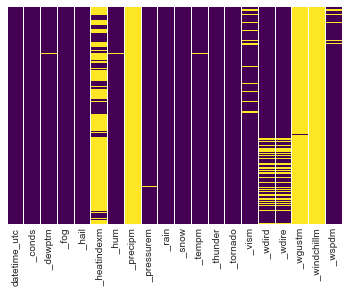

In [4]:
sns.heatmap(weather_ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
null_columns=weather_ds.columns[weather_ds.isnull().any()]
weather_ds[null_columns].isnull().sum()

 _conds             72
 _dewptm           621
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _tempm            673
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

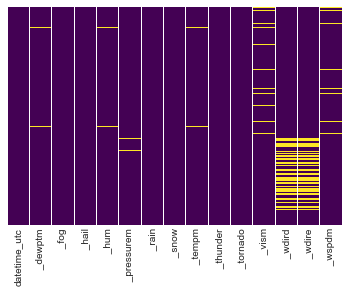

In [113]:
weather_ds=weather_ds.drop([' _conds',' _heatindexm',' _precipm',' _windchillm',' _wgustm'],axis=1)  # _conds also contain null values 
sns.heatmap(weather_ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [114]:
weather_ds[' _dewptm'].fillna(weather_ds[' _dewptm'].mean(), inplace=True)
weather_ds[' _hum'].fillna(weather_ds[' _hum'].mean(), inplace=True)
weather_ds[' _pressurem'].fillna(weather_ds[' _pressurem'].mean(), inplace=True)
weather_ds[' _tempm'].fillna(weather_ds[' _tempm'].mean(), inplace=True)
weather_ds[' _vism'].fillna(weather_ds[' _vism'].mean(), inplace=True)
weather_ds[' _wdird'].fillna(weather_ds[' _wdird'].mean(), inplace=True)
weather_ds[' _wdire'].fillna(weather_ds[' _wdire'].mode()[0], inplace=True) # for string value = mode()

weather_ds[' _wspdm'].fillna(weather_ds[' _wspdm'].mean(), inplace=True)

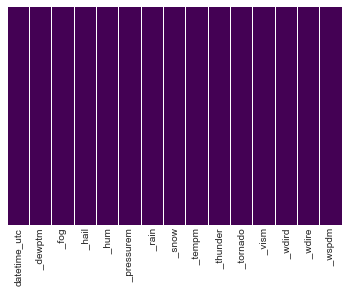

In [115]:
sns.heatmap(weather_ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

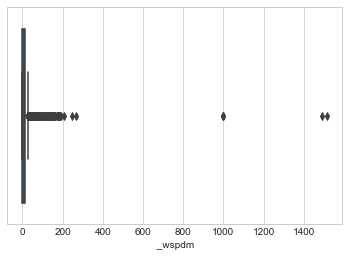

In [116]:
sns.boxplot(x=weather_ds[' _wspdm'])
#sns.boxplot(x=weather_ds[' _rain'])

In [117]:
filt_df = weather_ds[[' _dewptm',' _fog',' _hail',' _hum',' _pressurem',' _rain',' _snow',' _tempm',' _thunder',' _tornado',' _vism',' _wdird',' _wspdm']]

# removing outliers 

In [118]:
filt_df = filt_df.apply(lambda x: x[x.between(x.quantile(0.25),x.quantile(0.95))])
print(filt_df.head())



    _dewptm   _fog   _hail   _hum   _pressurem   _rain   _snow   _tempm  \
0       NaN      0     0.0    NaN       1010.0     0.0     0.0     30.0   
1      10.0      0     0.0    NaN          NaN     0.0     0.0     28.0   
2      11.0      0     0.0   44.0          NaN     0.0     0.0     24.0   
3      10.0      0     0.0   41.0       1010.0     0.0     0.0     24.0   
4      11.0      0     0.0   47.0       1011.0     0.0     0.0     23.0   

    _thunder   _tornado     _vism   _wdird    _wspdm  
0        0.0        0.0       NaN    280.0  7.400000  
1        0.0        0.0  2.402774      NaN  7.678463  
2        0.0        0.0  2.402774      NaN  7.678463  
3        0.0        0.0  2.000000      NaN  7.678463  
4        0.0        0.0       NaN      NaN  0.000000  


In [119]:
null_columns=filt_df.columns[filt_df.isnull().any()]
filt_df[null_columns].isnull().sum()

 _dewptm       27346
 _hail            13
 _hum          29171
 _pressurem    28423
 _rain          2652
 _snow             1
 _tempm        27692
 _thunder        952
 _tornado          2
 _vism         29516
 _wdird        27651
 _wspdm         4986
dtype: int64

In [120]:
filt_df[' _dewptm'].fillna(filt_df[' _dewptm'].mean(), inplace=True)
filt_df[' _fog'].fillna(filt_df[' _fog'].mean(), inplace=True)
filt_df[' _hail'].fillna(filt_df[' _hail'].mean(), inplace=True)
filt_df[' _pressurem'].fillna(filt_df[' _pressurem'].mean(), inplace=True)
filt_df[' _rain'].fillna(filt_df[' _rain'].mean(), inplace=True)
filt_df[' _snow'].fillna(filt_df[' _snow'].mean(), inplace=True)
filt_df[' _tempm'].fillna(filt_df[' _tempm'].mean(), inplace=True) 
filt_df[' _tornado'].fillna(filt_df[' _tornado'].mean(), inplace=True)
filt_df[' _vism'].fillna(filt_df[' _vism'].mean(), inplace=True)
filt_df[' _snow'].fillna(filt_df[' _snow'].mean(), inplace=True)
filt_df[' _wdird'].fillna(filt_df[' _wdird'].mean(), inplace=True) 
filt_df[' _wspdm'].fillna(filt_df[' _wspdm'].mean(), inplace=True)

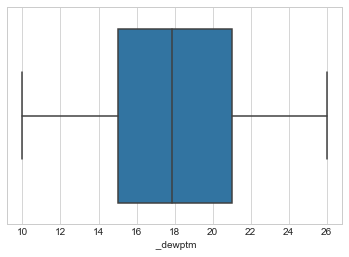

In [121]:
sns.boxplot(x=filt_df[' _dewptm'])

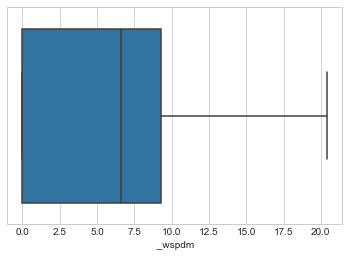

In [108]:
sns.boxplot(x=filt_df[' _wspdm'])

# plot of different numeric features

In [134]:
filt_df['datetime_utc']=weather_ds['datetime_utc']
filt_df.head()

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,datetime_utc
0,17.866782,0,0.0,NaN,1010.000000,0.0,0.0,30.0,0.0,0.0,2.605907,280.000000,7.400000,1996-11-01 11:00:00
1,10.000000,0,0.0,NaN,1010.564981,0.0,0.0,28.0,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 12:00:00
2,11.000000,0,0.0,44.0,1010.564981,0.0,0.0,24.0,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 13:00:00
3,10.000000,0,0.0,41.0,1010.000000,0.0,0.0,24.0,0.0,0.0,2.000000,204.174626,7.678463,1996-11-01 14:00:00
4,11.000000,0,0.0,47.0,1011.000000,0.0,0.0,23.0,0.0,0.0,2.605907,204.174626,0.000000,1996-11-01 16:00:00


In [137]:
filt_df['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

# generating year and month from datetime

In [159]:
filt_df['year']= filt_df['datetime_utc'].apply(lambda x: x.year)

In [161]:
filt_df['month']= filt_df['datetime_utc'].apply(lambda x: x.month)

In [163]:
filt_df.head()

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,datetime_utc,year,month
0,17.866782,0,0.0,NaN,1010.000000,0.0,0.0,30.0,0.0,0.0,2.605907,280.000000,7.400000,1996-11-01 11:00:00,1996,11
1,10.000000,0,0.0,NaN,1010.564981,0.0,0.0,28.0,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 12:00:00,1996,11
2,11.000000,0,0.0,44.0,1010.564981,0.0,0.0,24.0,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 13:00:00,1996,11
3,10.000000,0,0.0,41.0,1010.000000,0.0,0.0,24.0,0.0,0.0,2.000000,204.174626,7.678463,1996-11-01 14:00:00,1996,11
4,11.000000,0,0.0,47.0,1011.000000,0.0,0.0,23.0,0.0,0.0,2.605907,204.174626,0.000000,1996-11-01 16:00:00,1996,11


In [169]:
dataset=  pd.read_csv('testset.csv',parse_dates=['datetime_utc'])

In [170]:
filt_df[' _conds']=dataset[' _conds']

In [171]:
filt_df

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,datetime_utc,year,month,_conds
0,17.866782,0,0.0,NaN,1010.000000,0.0,0.0,30.000000,0.0,0.0,2.605907,280.000000,7.400000,1996-11-01 11:00:00,1996,11,Smoke
1,10.000000,0,0.0,NaN,1010.564981,0.0,0.0,28.000000,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 12:00:00,1996,11,Smoke
2,11.000000,0,0.0,44.0,1010.564981,0.0,0.0,24.000000,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 13:00:00,1996,11,Smoke
3,10.000000,0,0.0,41.0,1010.000000,0.0,0.0,24.000000,0.0,0.0,2.000000,204.174626,7.678463,1996-11-01 14:00:00,1996,11,Smoke
4,11.000000,0,0.0,47.0,1011.000000,0.0,0.0,23.000000,0.0,0.0,2.605907,204.174626,0.000000,1996-11-01 16:00:00,1996,11,Smoke
5,12.000000,0,0.0,56.0,1011.000000,0.0,0.0,21.000000,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 17:00:00,1996,11,Smoke
6,13.000000,0,0.0,60.0,1010.000000,0.0,0.0,21.000000,0.0,0.0,2.605907,204.174626,0.000000,1996-11-01 18:00:00,1996,11,Smoke
7,13.000000,0,0.0,60.0,1010.564981,0.0,0.0,21.000000,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 19:00:00,1996,11,Smoke
8,13.000000,0,0.0,68.0,1010.564981,0.0,0.0,19.000000,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 20:00:00,1996,11,Smoke
9,13.000000,0,0.0,68.0,1010.000000,0.0,0.0,19.000000,0.0,0.0,2.402774,204.174626,7.678463,1996-11-01 21:00:00,1996,11,Smoke


In [172]:
d = filt_df.groupby([' _conds','month'])[' _conds'].size().unstack(fill_value=0)

In [173]:
d

month,1,2,3,4,5,6,7,8,9,10,11,12
_conds,,,,,,,,,,,,
Blowing Sand,6,12,34,53,73,132,26,4,26,7,2,3
Clear,317,438,226,347,972,324,15,7,84,78,148,173
Drizzle,8,5,4,4,4,7,24,30,16,6,1,3
Fog,1434,279,35,1,0,0,0,2,2,17,87,903
Funnel Cloud,0,1,0,0,0,0,0,1,0,0,0,0
Haze,1212,2850,4703,4998,4641,5768,6119,5894,5940,3488,1187,802
Heavy Fog,269,17,7,0,0,0,0,0,0,0,10,118
Heavy Rain,5,1,4,0,0,1,14,1,2,0,0,0
Heavy Thunderstorms and Rain,2,0,1,0,2,3,4,7,1,0,0,2


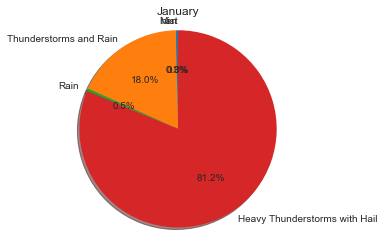

In [174]:
jan_data=list(d[1][0:5])
labels=list(set(filt_df[' _conds']))[0:5]
plt.pie(jan_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("January")
plt.show()

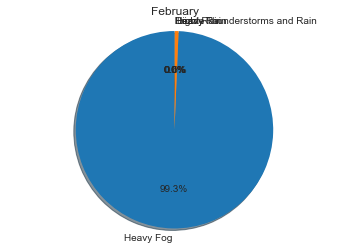

In [176]:
feb_data=list(d[2][5:10])
labels=list(set(filt_df[' _conds']))[5:10]
plt.pie(feb_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("February")
plt.show()

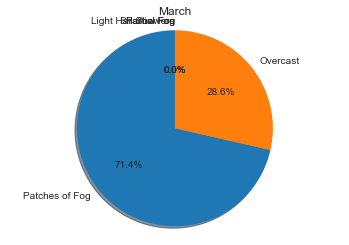

In [181]:
march_data=list(d[3][10:15])
labels=list(set(filt_df[' _conds']))[10:15]
plt.pie(march_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("March")
plt.show()

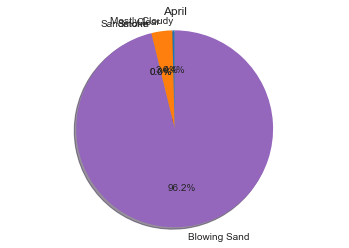

In [193]:
april_data=list(d[4][25:30])
labels=list(set(filt_df[' _conds']))[25:30]
plt.pie(april_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("April")
plt.show()

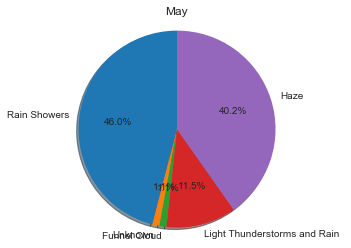

In [192]:
may_data=list(d[5][15:20])
labels=list(set(filt_df[' _conds']))[15:20]
plt.pie(may_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("May")
plt.show()

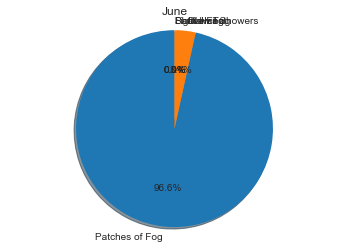

In [191]:
june_data=list(d[6][10:15])
labels=list(set(filt_df[' _conds']))[10:15]
plt.pie(june_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("June")
plt.show()

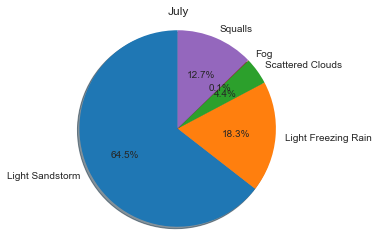

In [190]:
july_data=list(d[7][20:25])
labels=list(set(filt_df[' _conds']))[20:25]
plt.pie(july_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("July")
plt.show()

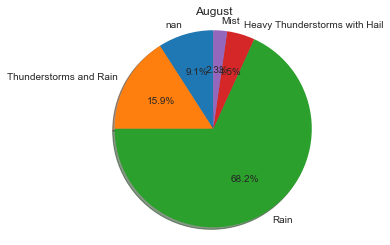

In [189]:
august_data=list(d[8][0:5])
labels=list(set(filt_df[' _conds']))[0:5]
plt.pie(august_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("August")
plt.show()

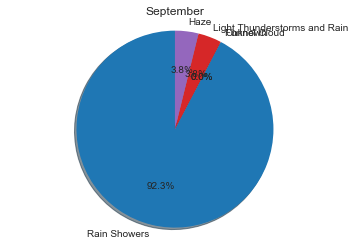

In [188]:
sep_data=list(d[9][15:20])
labels=list(set(filt_df[' _conds']))[15:20]
plt.pie(sep_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("September")
plt.show()

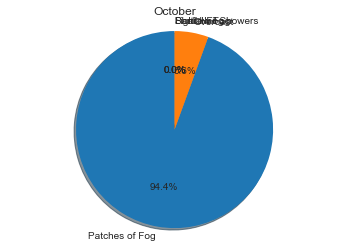

In [187]:
oct_data=list(d[10][10:15])
labels=list(set(filt_df[' _conds']))[10:15]
plt.pie(oct_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("October")
plt.show()

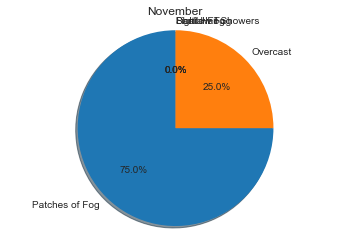

In [186]:
nov_data=list(d[11][10:15])
labels=list(set(filt_df[' _conds']))[10:15]
plt.pie(nov_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("November")
plt.show()

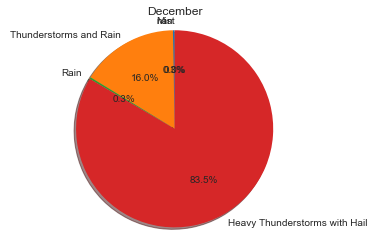

In [185]:
dec_data=list(d[12][0:5])
labels=list(set(filt_df[' _conds']))[0:5]
plt.pie(dec_data,labels=labels,startangle=90,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.title("December")
plt.show()

In [ ]:
# PLOT

Text(0.5,1,'_wspdm')

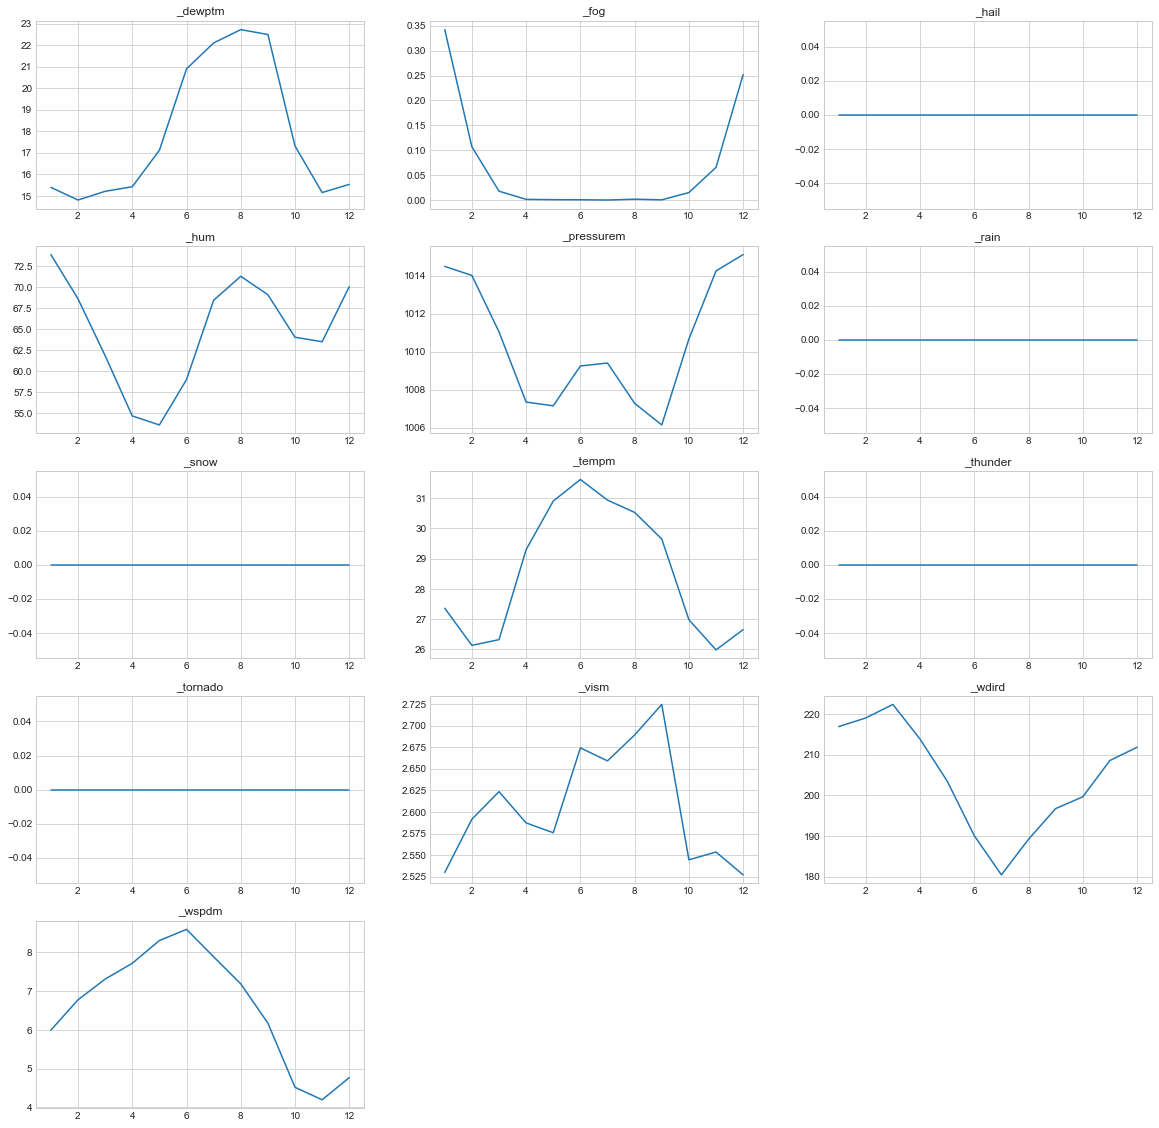

In [194]:
humi = filt_df.groupby("month").mean()

plt.figure(figsize=(20,20))

plt.subplot(5,3,1)
plt.plot(humi[' _dewptm'])
plt.title('_dewptm')

plt.subplot(5,3,2)
plt.plot(humi[' _fog'])
plt.title('_fog')

plt.subplot(5,3,3)
plt.plot(humi[' _hail'])
plt.title('_hail')

plt.subplot(5,3,4)
plt.plot(humi[' _hum'])
plt.title('_hum')

plt.subplot(5,3,5)
plt.plot(humi[' _pressurem'])
plt.title('_pressurem')

plt.subplot(5,3,6)
plt.plot(humi[' _rain'])
plt.title('_rain')

plt.subplot(5,3,7)
plt.plot(humi[' _snow'])
plt.title('_snow')

plt.subplot(5,3,8)
plt.plot(humi[' _tempm'])
plt.title('_tempm')

plt.subplot(5,3,9)
plt.plot(humi[' _thunder'])
plt.title('_thunder')

plt.subplot(5,3,10)
plt.plot(humi[' _tornado'])
plt.title('_tornado')

plt.subplot(5,3,11)
plt.plot(humi[' _vism'])
plt.title('_vism')

plt.subplot(5,3,12)
plt.plot(humi[' _wdird'])
plt.title('_wdird')

plt.subplot(5,3,13)
plt.plot(humi[' _wspdm'])
plt.title('_wspdm')